In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

## Planes

In [3]:
N = 1020 # The number of Z's in all of Shakespeare's plays
sample_size = 30
population = Table().with_column('Serial number', np.arange(N)+1)
observation = population.sample(sample_size).column(0)

In [5]:
observation

array([ 671,   38,  590,  981,  204,   23,  286,  454,  464,  436,  284,
        931,  467,  596,  565,  463,  151,  692,  937,  910,  504,  870,
         22,  726,  938, 1007,  267,  353,  287,  351])

In [6]:
observation.max()

1007

In [7]:
np.average(observation)

515.60000000000002

### What is N?¿?¿?¿?¿?

In [8]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles
)

estimates

Max,2 * average
997,1131.33
996,946.4
975,1064.8
1011,995.667
970,1176.73
1010,1011.53
977,993
1007,1155.87
1015,1041.13
1003,1010.33


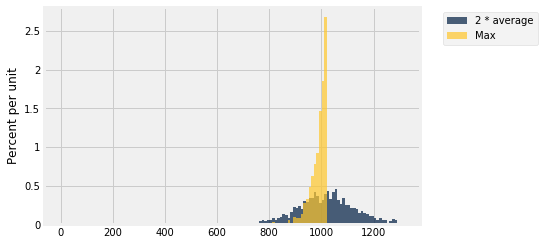

In [9]:
every_ten = np.arange(1, N+300, 10)
estimates.hist(bins=every_ten)

## A Clever Estimator

In [11]:
maxes = make_array()   # max(observations)
doubles = make_array() # 2 * np.average(observations)
double_median = make_array() # 2 * np.median(observations)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    double_median = np.append(double_median, 2 * np.median(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    '2 * median', double_median,
)

estimates

Max,2 * average,2 * median
1005,917.2,874
972,978.733,949
992,1116.6,1118
1019,967.267,864
1018,972.667,902
1013,1104.93,1097
1018,939.667,899
953,726.133,643
1020,875.933,805
1014,1059.13,1108


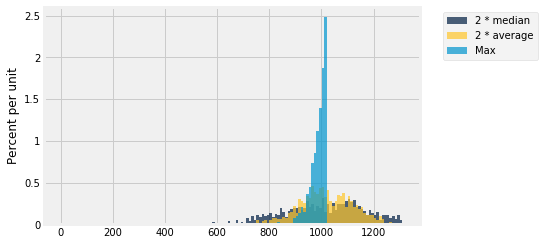

In [12]:
estimates.hist(bins=every_ten)

In [13]:
maxes = make_array()    # max(observations)
doubles = make_array()  # 2 * np.average(observations)
max_plus_min = make_array() # clever(observation)

for i in np.arange(1000):
    observation = population.sample(sample_size).column(0)
    maxes = np.append(maxes, max(observation))
    doubles = np.append(doubles, 2 * np.average(observation))
    max_plus_min = np.append(max_plus_min,
                             np.max(observation) + np.min(observation))

estimates = Table().with_columns(
    'Max', maxes,
    '2 * average', doubles,
    'Max + min', max_plus_min,
)

estimates

Max,2 * average,Max + min
1015,1260.6,1113
1011,1077.87,1029
1004,1044.33,1014
1018,1116.53,1121
1016,1084.53,1026
999,936,1028
1013,1044.53,1032
923,943.133,925
1002,984.933,1043
960,953.8,968


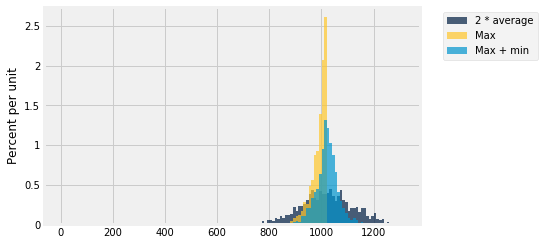

In [14]:
estimates.hist(bins=every_ten)

## Bias & Variability

In [20]:
np.abs(estimates.column(0) -
       estimates.column(0).mean()).mean()

22.93005999999999

In [22]:
np.abs(estimates.column(1) -
       estimates.column(1).mean()).mean()

82.329999999999998

In [21]:
np.abs(estimates.column(2) -
       estimates.column(2).mean()).mean()

31.59365

## Swain v Alabama

What is the probability of getting 8/100 blacks in a panel?

1. Start with distributions of eligible panel and the actual panel.
2. Draw panels at random from my population.
3. Estimate the probability; see if actual panel is likely.

In [23]:
swain = Table().with_columns(
    'Ethnicity', make_array('Black', 'Other'),
    'Eligible', make_array(0.26, 0.74),
    'Panel', make_array(0.08, 0.92)
)

swain.set_format([1, 2], PercentFormatter(0))

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


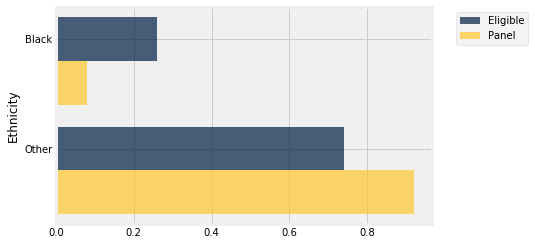

In [24]:
swain.barh(0)

## Total Variation Distance

In [27]:
swain

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


In [33]:
tvd = sum(abs(swain.column(1) - swain.column(2))) / 2
tvd

0.18000000000000002

In [35]:
def total_variation_distance(dist1, dist2):
    return sum(abs(dist1 - dist2)) / 2
    
total_variation_distance(swain.column(1), swain.column(2))

0.18000000000000002

## Sample panels

In [36]:
swain

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


In [37]:
swain.sample(10)

Ethnicity,Eligible,Panel
Other,74%,92%
Other,74%,92%
Other,74%,92%
Other,74%,92%
Black,26%,8%
Other,74%,92%
Other,74%,92%
Black,26%,8%
Other,74%,92%
Black,26%,8%


In [39]:
ethnicities = swain.select(0)
ethnicities

Ethnicity
Black
Other


In [40]:
ethnicities.sample(10)

Ethnicity
Black
Black
Black
Other
Other
Black
Black
Black
Black
Black


In [43]:
pop_dist = swain.column('Eligible')
pop_dist

array([ 0.26,  0.74])

In [45]:
ethnicities.sample(100, weights=pop_dist)

Ethnicity
Other
Black
Other
Other
Other
Black
Other
Other
Other
Black


In [52]:
sample_panel = (ethnicities.sample(100, weights=pop_dist)
                .group('Ethnicity'))
counts = sample_panel.column('count')
proportions = counts / 100
proportions

array([ 0.23,  0.77])

In [58]:
with_random = swain.with_column('Random', proportions)
with_random.set_format([1, 2, 3], PercentFormatter(0))

Ethnicity,Eligible,Panel,Random
Black,26%,8%,23%
Other,74%,92%,77%


In [68]:
def random_jury_panel():
    sample_panel = (ethnicities.sample(100, weights=pop_dist)
                    .group('Ethnicity'))
    counts = sample_panel.column('count')
    proportions = counts / 100
    with_random = swain.with_column('Random', proportions)
    with_random.set_format([1, 2, 3], PercentFormatter(0))
    return with_random

random_jury_panel()

Ethnicity,Eligible,Panel,Random
Black,26%,8%,27%
Other,74%,92%,73%


In [69]:
total_variation_distance?

In [71]:
repetitions = 1000
tvds = make_array()

for i in np.arange(repetitions):
    new_sample = random_jury_panel()
    tvds = np.append(tvds,
                     total_variation_distance(
                         new_sample.column(1),
                         new_sample.column(3),
                     ))

results = Table().with_column(
    'TVD between population and a random sample',
    tvds
)
results

TVD between population and a random sample
0
0.06
0.06
0.08
0.01
0.02
0.02
0.06
0.01
0.03


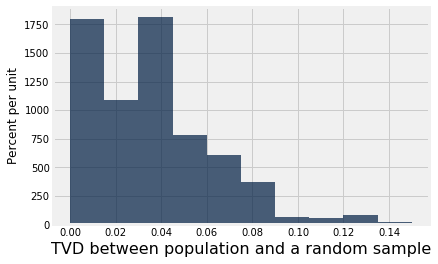

In [72]:
results.hist()

In [73]:
swain

Ethnicity,Eligible,Panel
Black,26%,8%
Other,74%,92%


In [74]:
tvd

0.18000000000000002